# Sigmoid generator 

This code is use to generate the coeficients of the sigmoid signal

In [7]:
import math
import matplotlib.pyplot as plt

### function sigmoid

In [8]:
def sigmoid(x):
    try:
        return 1 / (1+math.exp(-x)) #for x less than -1023 will give value error
    except:
        return 0

### function Decimal to Binary

In [9]:
def DtoB(num, dataWidth, fracBits): #funtion for converting into two's complement format
    if num >= 0:
        num = num * (2**fracBits)
        num = int(num)
        e = bin(num)[2:]
    else:
        num = -num
        num = num * (2**fracBits) # number of fractional bits
        num = int(num)
        if num == 0:
            d = 0
        else:
            d = 2**dataWidth - num
        e = bin(d)[2:]
    return e

### funtion generate sigmoid content

In [14]:
def genSigContent(dataWidth, sigmoidSize, weightIntSize, inputIntSize):
    f = open("sigContent.mif", "w")
    fractBits = sigmoidSize-(weightIntSize+inputIntSize)
    if fractBits < 0: #Sigmoid size is smaller the integer part of the MAC operation
        fractBits = 0
    x = -2**(weightIntSize+inputIntSize-1) #Smallest input going to the Sigmoid LUT from the neuron
    gy = []
    gx = []
    for i in range(0, 2**sigmoidSize):
        y = sigmoid(x)
        z = DtoB(y, dataWidth, dataWidth-inputIntSize)
        f.write(z+'\n')
        x = x+(2**-fractBits)

        gy.append(y)
        gx.append(x)
    f.close()

    plt.figure()
    plt.plot(gx,gy)

## Main function

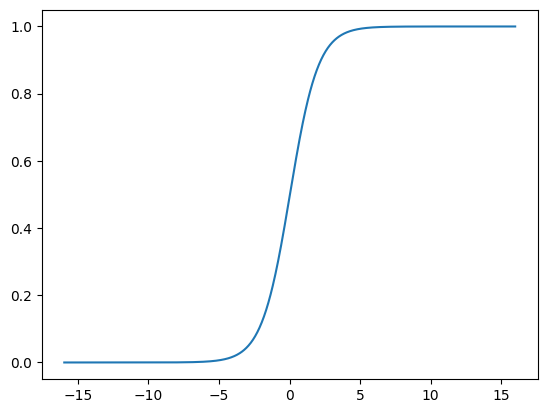

In [16]:
genSigContent(dataWidth=16, sigmoidSize=10, weightIntSize=4, inputIntSize=1)